In [1]:
import sys
sys.path.append('../financial_options')
sys.path.append('../financial_options/utils')

%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import volatilityProbability as vp
import black_scholes as bs
import vol_curves

## Parabolic Volatility Curves

In [2]:
# Market Properties
s = np.array([100])
k = np.arange(1,199,0.01)
volcap = 2
k_ret = (k - s) / s

# First Expiration
tte_0_t1 = np.array([14])
vol_0_t1 = vol_curves.parabolic_vol_curve(k,0.45,70,0.05,125, volcap=volcap)
price_0_t1 = bs.option_price(s*np.ones(k.shape), k, k < s, vol_0_t1,tte_0_t1*np.ones(k.shape))
chvol_0_t1, chskew_0_t1 = vp.volproperties_vol(s,k,vol_0_t1,tte_0_t1)
pdf_0_t1, k_pdf_0_t1, _, _ = vp.volcurve2pdf(s,k,vol_0_t1,tte_0_t1)

# Second Expiration
tte_0_t2 = np.array([28])
vol_0_t2 = vol_curves.parabolic_vol_curve(k,0.3,80,0.08,120, volcap=volcap)
price_0_t2 = bs.option_price(s*np.ones(k.shape), k, k < s, vol_0_t2,tte_0_t2*np.ones(k.shape))
chvol_0_t2, chskew_0_t2 = vp.volproperties_vol(s,k,vol_0_t2,tte_0_t2)
pdf_0_t2, k_pdf_0_t2, _, _ = vp.volcurve2pdf(s,k,vol_0_t2,tte_0_t2)

print('Vol_t1: {0:.4f} -- SKEW_t1: {1:3.2f} \nTTE_t1: {2:.0f}'.format(chvol_0_t1[0], chskew_0_t1[0],tte_0_t1[0]))
print('Vol_t2: {0:.4f} -- SKEW_t2: {1:3.2f} \nTTE_t2: {2:.0f}'.format(chvol_0_t2[0], chskew_0_t2[0],tte_0_t2[0]))


Vol_t1: 0.1374 -- SKEW_t1: 109.62 
TTE_t1: 14
Vol_t2: 0.1475 -- SKEW_t2: 147.22 
TTE_t2: 28


Vol_t1: 0.1374 -- SKEW_t1: 109.62 
TTE_t1: 14
Vol_t2: 0.1475 -- SKEW_t2: 147.22 
TTE_t2: 28


<IPython.core.display.Javascript object>


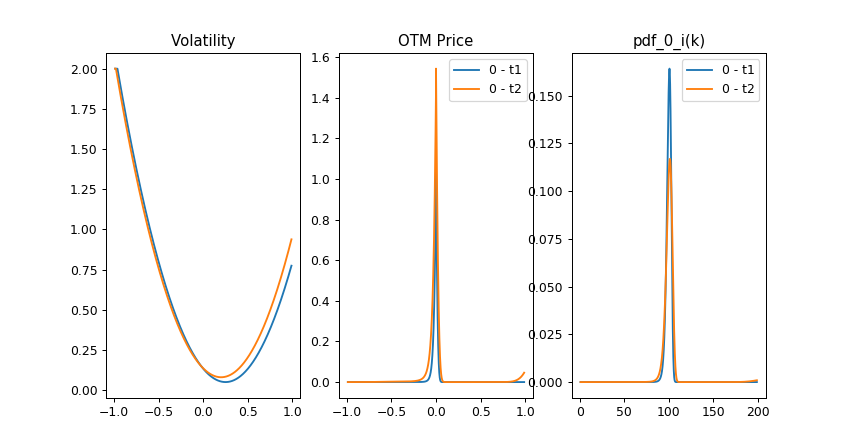

In [3]:
print('Vol_t1: {0:.4f} -- SKEW_t1: {1:3.2f} \nTTE_t1: {2:.0f}'.format(chvol_0_t1[0], chskew_0_t1[0],tte_0_t1[0]))
print('Vol_t2: {0:.4f} -- SKEW_t2: {1:3.2f} \nTTE_t2: {2:.0f}'.format(chvol_0_t2[0], chskew_0_t2[0],tte_0_t2[0]))

plt.figure(figsize=(9.5,5))
plt.subplot(131)
plt.plot(k_ret,vol_0_t1, label='0 - t1')
plt.plot(k_ret, vol_0_t2, label='0 - t2')
plt.legend
plt.title('Volatility')

plt.subplot(132)
plt.plot(k_ret,price_0_t1, label='0 - t1')
plt.plot(k_ret,price_0_t2, label='0 - t2')
plt.legend()
plt.title('OTM Price')

plt.subplot(133)
plt.plot(k_pdf_0_t1, pdf_0_t1, label='0 - t1')
plt.plot(k_pdf_0_t2, pdf_0_t2, label='0 - t2')
plt.legend()
plt.title('pdf_0_i(k)')

<IPython.core.display.Javascript object>


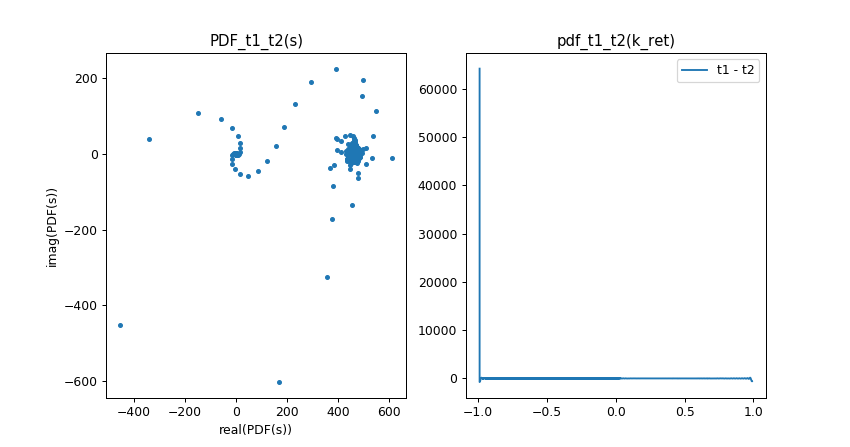

In [4]:
PDF_0_t1 = np.fft.rfft(pdf_0_t1, norm='ortho')
PDF_0_t2 = np.fft.rfft(pdf_0_t2, norm='ortho')
PDF_t1_t2 = PDF_0_t2 / PDF_0_t1
pdf_t1_t2 = np.fft.irfft(PDF_t1_t2, norm='ortho')

plt.figure(figsize=(9.5,5))
plt.subplot(121)
plt.plot(PDF_t1_t2.real, PDF_t1_t2.imag, label='t1 - t2',ls='', marker='.')
plt.xlabel('real(PDF(s))')
plt.ylabel('imag(PDF(s))')
plt.title('PDF_t1_t2(s)')
plt.subplot(122)
plt.plot(k_ret[1:-1], pdf_t1_t2, label='t1 - t2')
plt.title('pdf_t1_t2(k_ret)')
plt.legend()

## Constant Vol Curve

In [5]:
# Market Properties
s = np.array([100])
k = np.arange(25,150,0.01)
k_pivot = 80
volcap = 1.25
k_ret = (k - s) / s

# First Expiration
tte_0_t1 = np.array([7])
vol_0_t1 = vol_curves.parabolic_vol_curve(k,0.12,k_pivot,0.12,115, volcap=volcap)
price_0_t1 = bs.option_price(s*np.ones(k.shape), k, k < s, vol_0_t1,tte_0_t1*np.ones(k.shape))
chvol_0_t1, chskew_0_t1 = vp.volproperties_vol(s,k,vol_0_t1,tte_0_t1)
pdf_0_t1, k_pdf_0_t1, _, _ = vp.volcurve2pdf(s,k,vol_0_t1,tte_0_t1)

# Second Expiration
tte_0_t2 = np.array([14])
vol_0_t2 = vol_curves.parabolic_vol_curve(k,0.12,k_pivot,0.12,120, volcap=volcap)
price_0_t2 = bs.option_price(s*np.ones(k.shape), k, k < s, vol_0_t2,tte_0_t2*np.ones(k.shape))
chvol_0_t2, chskew_0_t2 = vp.volproperties_vol(s,k,vol_0_t2,tte_0_t2)
pdf_0_t2, k_pdf_0_t2, _, _ = vp.volcurve2pdf(s,k,vol_0_t2,tte_0_t2)

print('Vol_t1: {0:.4f} -- SKEW_t1: {1:3.2f} \nTTE_t1: {2:.0f}'.format(chvol_0_t1[0], chskew_0_t1[0],tte_0_t1[0]))
print('Vol_t2: {0:.4f} -- SKEW_t2: {1:3.2f} \nTTE_t2: {2:.0f}'.format(chvol_0_t2[0], chskew_0_t2[0],tte_0_t2[0]))


Vol_t1: 0.1200 -- SKEW_t1: 99.52 
TTE_t1: 7
Vol_t2: 0.1200 -- SKEW_t2: 99.33 
TTE_t2: 14


Vol_t1: 0.1200 -- SKEW_t1: 99.52 
TTE_t1: 7
Vol_t2: 0.1200 -- SKEW_t2: 99.33 
TTE_t2: 14


<IPython.core.display.Javascript object>


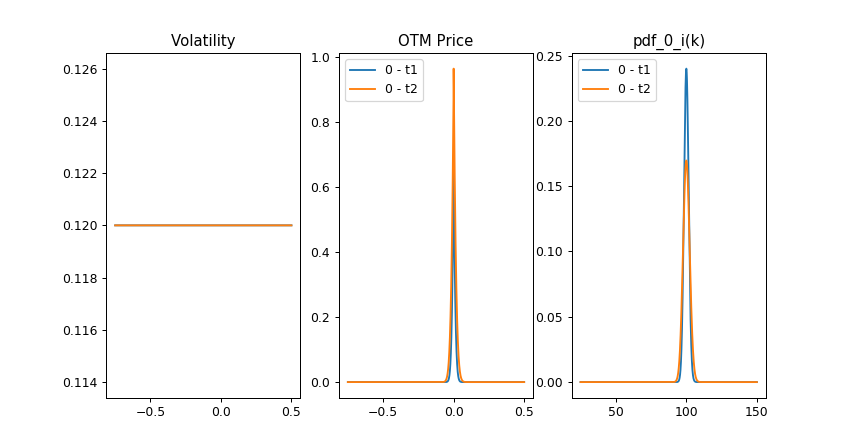

In [6]:
print('Vol_t1: {0:.4f} -- SKEW_t1: {1:3.2f} \nTTE_t1: {2:.0f}'.format(chvol_0_t1[0], chskew_0_t1[0],tte_0_t1[0]))
print('Vol_t2: {0:.4f} -- SKEW_t2: {1:3.2f} \nTTE_t2: {2:.0f}'.format(chvol_0_t2[0], chskew_0_t2[0],tte_0_t2[0]))

plt.figure(figsize=(9.5,5))
plt.subplot(131)
plt.plot(k_ret,vol_0_t1, label='0 - t1')
plt.plot(k_ret, vol_0_t2, label='0 - t2')
plt.legend
plt.title('Volatility')

plt.subplot(132)
plt.plot(k_ret,price_0_t1, label='0 - t1')
plt.plot(k_ret,price_0_t2, label='0 - t2')
plt.legend()
plt.title('OTM Price')

plt.subplot(133)
plt.plot(k_pdf_0_t1, pdf_0_t1, label='0 - t1')
plt.plot(k_pdf_0_t2, pdf_0_t2, label='0 - t2')
plt.legend()
plt.title('pdf_0_i(k)')

<IPython.core.display.Javascript object>


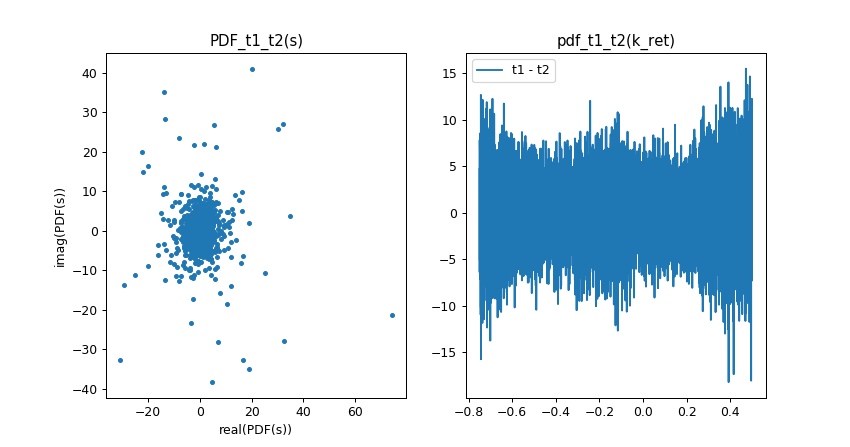

In [7]:
PDF_0_t1 = np.fft.rfft(pdf_0_t1, norm='ortho')
PDF_0_t2 = np.fft.rfft(pdf_0_t2, norm='ortho')
PDF_t1_t2 = PDF_0_t2 / PDF_0_t1
pdf_t1_t2 = np.fft.irfft(PDF_t1_t2, norm='ortho')

plt.figure(figsize=(9.5,5))
plt.subplot(121)
plt.plot(PDF_t1_t2.real, PDF_t1_t2.imag, label='t1 - t2',ls='', marker='.')
plt.xlabel('real(PDF(s))')
plt.ylabel('imag(PDF(s))')
plt.title('PDF_t1_t2(s)')
plt.subplot(122)
plt.plot(k_ret[1:-1], pdf_t1_t2, label='t1 - t2')
plt.title('pdf_t1_t2(k_ret)')
plt.legend()